### Name : Varaun Gandhi
### Andrew_ID : vbgandhi

In [458]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [459]:
#load the dataset
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,SD,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,SD,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


### Data Information

In [460]:
#Datatypes
df.dtypes

viewer_id                       object
gender                          object
age                              int64
married                         object
number_of_family_dependents      int64
city                            object
zip_code                         int64
latitude                       float64
longitude                      float64
number_of_referrals              int64
tenure_in_months                 int64
offer                           object
internet_service                object
internet_type                   object
avg_monthly_gb_download        float64
online_security                 object
online_backup                   object
device_protection_plan          object
premium_tech_support            object
streaming_tv                    object
streaming_movies                object
streaming_music                 object
unlimited_hi-res_streaming      object
subscription_type               object
paperless_billing               object
payment_method           

In [461]:
# Display the structure of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   viewer_id                    6588 non-null   object 
 1   gender                       6588 non-null   object 
 2   age                          6588 non-null   int64  
 3   married                      6588 non-null   object 
 4   number_of_family_dependents  6588 non-null   int64  
 5   city                         6588 non-null   object 
 6   zip_code                     6588 non-null   int64  
 7   latitude                     6588 non-null   float64
 8   longitude                    6588 non-null   float64
 9   number_of_referrals          6588 non-null   int64  
 10  tenure_in_months             6588 non-null   int64  
 11  offer                        2990 non-null   object 
 12  internet_service             6588 non-null   object 
 13  internet_type     

In [462]:
# Check for missing values
print(df.isnull().sum())

viewer_id                         0
gender                            0
age                               0
married                           0
number_of_family_dependents       0
city                              0
zip_code                          0
latitude                          0
longitude                         0
number_of_referrals               0
tenure_in_months                  0
offer                          3598
internet_service                  0
internet_type                  1344
avg_monthly_gb_download        1344
online_security                1344
online_backup                  1344
device_protection_plan         1344
premium_tech_support           1344
streaming_tv                   1344
streaming_movies               1344
streaming_music                1344
unlimited_hi-res_streaming     1344
subscription_type                 0
paperless_billing                 0
payment_method                    0
monthly_charge                    0
total_charges               

In [463]:
#Display summary statistics for numerical columns
display(df.describe(include=[np.number]).T)

,count,mean,std,min,25%,50%,75%,max
age,6588.0,46.757438,16.840793,19.000000,33.000000,46.000000,60.000000,80.000000
number_of_family_dependents,6588.0,0.476169,0.968555,0.000000,0.000000,0.000000,0.000000,9.000000
zip_code,6588.0,93491.512750,1857.716269,90001.000000,92103.000000,93526.000000,95333.250000,96150.000000
latitude,6588.0,36.199980,2.472582,32.555828,33.989286,36.245926,38.169605,41.962127
longitude,6588.0,-119.757549,2.155838,-124.301372,-121.790034,-119.601370,-117.967399,-114.192901
number_of_referrals,6588.0,2.021099,3.024220,0.000000,0.000000,0.000000,3.000000,11.000000
tenure_in_months,6588.0,34.494232,23.966333,1.000000,12.000000,32.000000,57.000000,72.000000
avg_monthly_gb_download,5244.0,26.228261,19.566861,2.000000,13.000000,21.000000,30.000000,85.000000
monthly_charge,6588.0,65.023915,31.098217,-10.000000,35.800000,71.025000,90.400000,118.750000
total_charges,6588.0,2431.211611,2264.668413,18.850000,544.362500,1562.700000,3998.350000,8684.800000


In [464]:
#Stdandard deviation is high for 'total_charges' and 'total_revenue', indicating a wide range of values.

### EDA

In [465]:
#Drop zip code, latitude, longitude, viewer_id as they are not useful for analysis
df = df.drop(columns=['zip_code', 'latitude', 'longitude','viewer_id'])
df.head()

,gender,age,married,number_of_family_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,...,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,Female,37,Yes,0,SD,2,9,NaN,Yes,Cable,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,SD,0,9,NaN,Yes,Cable,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,SD,0,4,Offer E,Yes,Fiber Optic,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,SD,1,13,Offer D,Yes,Fiber Optic,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,SD,3,3,NaN,Yes,Fiber Optic,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [466]:
#Churn count analysis
churn_counts = df['viewer_status'].value_counts()
print(churn_counts)
churn_rate = df['viewer_status'].value_counts(normalize=True) * 100
print(churn_rate)

viewer_status
Stayed     4719
Churned    1869
Name: count, dtype: int64
viewer_status
Stayed     71.630237
Churned    28.369763
Name: proportion, dtype: float64


/var/folders/_d/07fvhvx16qj9690gst6xd02r0000gn/T/ipykernel_7396/935124498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='viewer_status', palette='Set2')


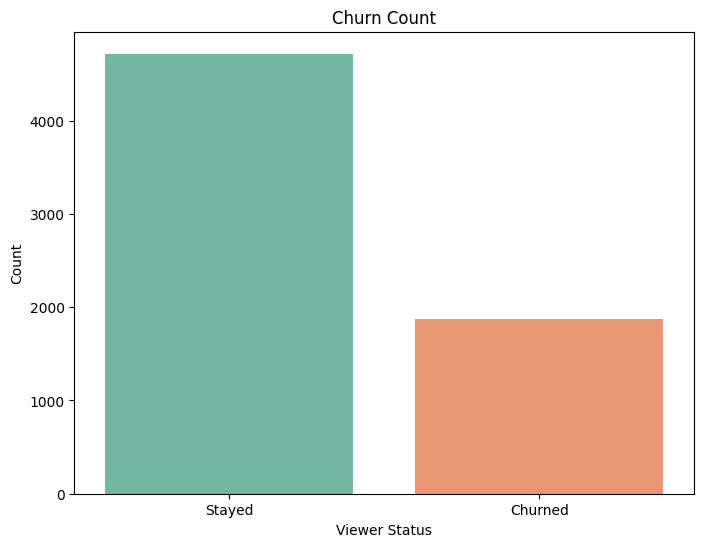

In [467]:
#Visualize target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='viewer_status', palette='Set2')
plt.title('Churn Count')
plt.xlabel('Viewer Status')
plt.ylabel('Count')
plt.show()

In [468]:
# Identify numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

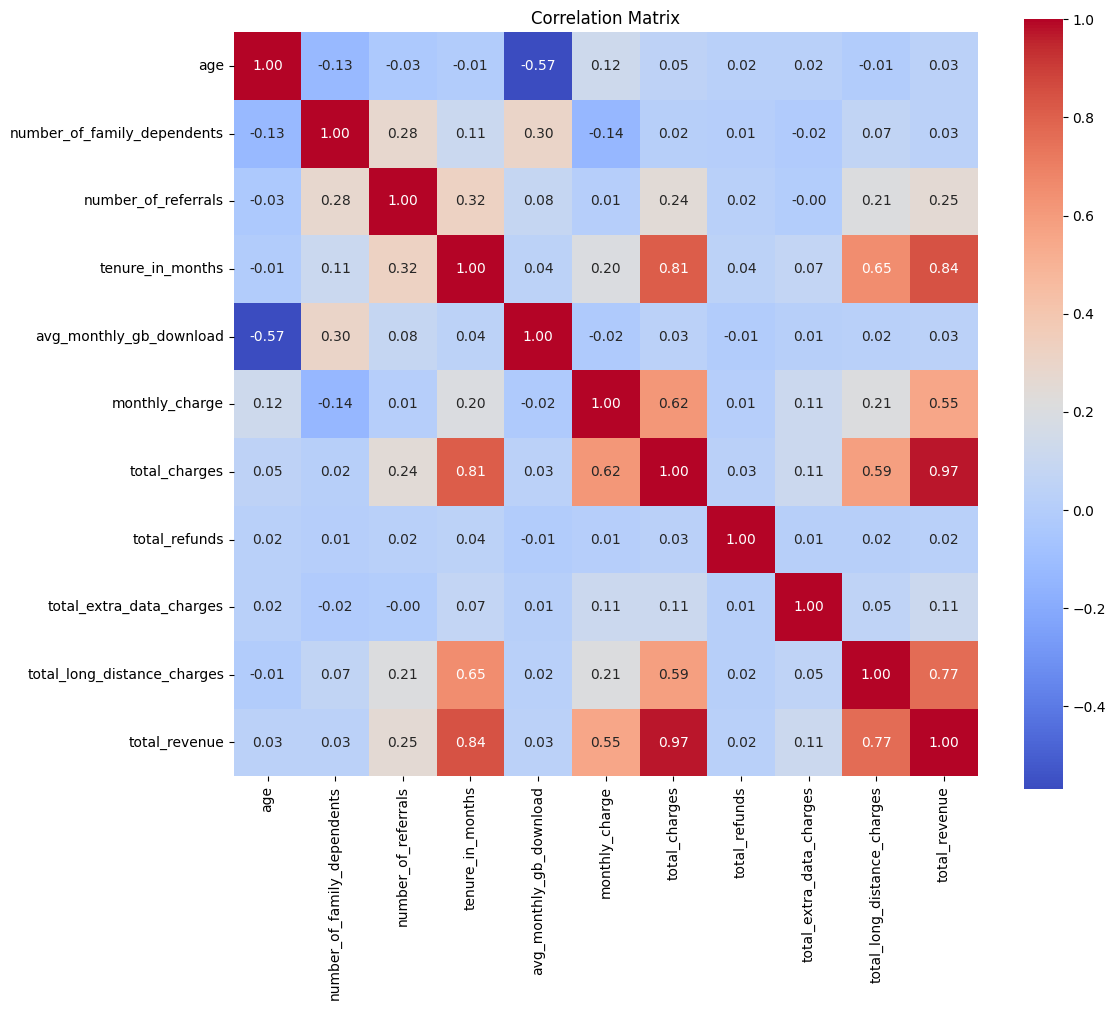

In [469]:
#build correlation matrix for numerical features
plt.figure(figsize=(12, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [470]:
# From the correlation matrix, we can see that 'total_revenue' and 'total_charges' are highly correlated with each other.
# One of the two can be dropped to avoid multicollinearity.

In [471]:
# Drop 'total_charges' to avoid multicollinearity
df = df.drop(columns=['total_charges'])
numerical_cols.remove('total_charges')

In [472]:
# Separate transaction-related columns and categorical columns
transaction_cols = [col for col in numerical_cols if col not in [
    'number_of_family_dependents',
    'number_of_referrals',
    'avg_monthly_gb_download', 'age', 'tenure_in_months'
]]
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

### Data Prep

In [473]:
#Check for outliers and handle them
df_clean = df.copy()

for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f'Column: {column} : Number of outliers handled: {len(outliers)}')
    df_clean[column] = df_clean[column].clip(lower=lower_bound, upper=upper_bound)
    outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)][column]

# Outliers are handled by clipping them to the lower and upper bounds.

Column: age : Number of outliers handled: 0
Column: number_of_family_dependents : Number of outliers handled: 1547
Column: number_of_referrals : Number of outliers handled: 649
Column: tenure_in_months : Number of outliers handled: 0
Column: avg_monthly_gb_download : Number of outliers handled: 618
Column: monthly_charge : Number of outliers handled: 0
Column: total_refunds : Number of outliers handled: 520
Column: total_extra_data_charges : Number of outliers handled: 684
Column: total_long_distance_charges : Number of outliers handled: 136
Column: total_revenue : Number of outliers handled: 9


In [474]:
#Replace Nan in numerical columns with median
for c in numerical_cols:
    if df_clean[c].isna().any():
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())

#Missing values are handled by replacing them with the median of the respective columns.

In [475]:
#Replace NaN with None for categorical features
categorical_features = df_clean.select_dtypes(include=['object']).columns.tolist()
df_clean[categorical_features] = df_clean[categorical_features].fillna('None')
#Check for missing values again
print(df_clean.isnull().sum())

#Missing values are handled by replacing them with 'None' for categorical features.

gender                         0
age                            0
married                        0
number_of_family_dependents    0
city                           0
number_of_referrals            0
tenure_in_months               0
offer                          0
internet_service               0
internet_type                  0
avg_monthly_gb_download        0
online_security                0
online_backup                  0
device_protection_plan         0
premium_tech_support           0
streaming_tv                   0
streaming_movies               0
streaming_music                0
unlimited_hi-res_streaming     0
subscription_type              0
paperless_billing              0
payment_method                 0
monthly_charge                 0
total_refunds                  0
total_extra_data_charges       0
total_long_distance_charges    0
total_revenue                  0
viewer_status                  0
dtype: int64


In [476]:
#normalize numerical features to avoid scaling issues
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
df_normalized = df_clean.copy()
df_normalized[numerical_features] = scaler.fit_transform(df_clean[numerical_features])
df_normalized.head()

,gender,age,married,number_of_family_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,...,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,Female,0.295082,Yes,0.0,SD,0.266667,0.112676,None,Yes,Cable,...,Yes,One Year,Yes,Credit Card,0.587184,0.0,0.0,0.125924,0.082971,Stayed
1,Male,0.442623,No,0.0,SD,0.000000,0.112676,None,Yes,Cable,...,No,Month-to-Month,No,Credit Card,0.046602,0.0,0.0,0.031756,0.051241,Stayed
2,Male,0.508197,No,0.0,SD,0.000000,0.042254,Offer E,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,0.651650,0.0,0.0,0.044427,0.034282,Churned
3,Male,0.967213,Yes,0.0,SD,0.133333,0.169014,Offer D,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,0.838835,0.0,0.0,0.119372,0.137348,Churned
4,Female,0.918033,Yes,0.0,SD,0.400000,0.028169,None,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Credit Card,0.729320,0.0,0.0,0.007308,0.023322,Churned


In [477]:
#one-hot encode categorical features in a df_normalized
df_final = pd.get_dummies(df_normalized, columns=categorical_features, drop_first=True)
bool_cols = df_final.select_dtypes(include=['bool']).columns
df_final[bool_cols] = df_final[bool_cols].astype(int)
df_final.head()


,age,number_of_family_dependents,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,...,streaming_music_None,streaming_music_Yes,unlimited_hi-res_streaming_None,unlimited_hi-res_streaming_Yes,subscription_type_One Year,subscription_type_Two Year,paperless_billing_Yes,payment_method_Credit Card,payment_method_Mailed Check,viewer_status_Stayed
0,0.295082,0.0,0.266667,0.112676,0.261682,0.587184,0.0,0.0,0.125924,0.082971,...,0,0,0,1,1,0,1,1,0,1
1,0.442623,0.0,0.000000,0.112676,0.149533,0.046602,0.0,0.0,0.031756,0.051241,...,0,1,0,0,0,0,0,1,0,1
2,0.508197,0.0,0.000000,0.042254,0.523364,0.651650,0.0,0.0,0.044427,0.034282,...,0,0,0,1,0,0,1,0,0,0
3,0.967213,0.0,0.133333,0.169014,0.037383,0.838835,0.0,0.0,0.119372,0.137348,...,0,0,0,1,0,0,1,0,0,0
4,0.918033,0.0,0.400000,0.028169,0.168224,0.729320,0.0,0.0,0.007308,0.023322,...,0,0,0,1,0,0,1,1,0,0


In [478]:
# train-test split
from sklearn.model_selection import train_test_split
X = df_final.drop(columns=['viewer_status_Stayed'])
y = df_final['viewer_status_Stayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')
y_train_churn = 1 - y_train
y_test_churn  = 1 - y_test

Training set size: 5270
Testing set size: 1318


### PCA

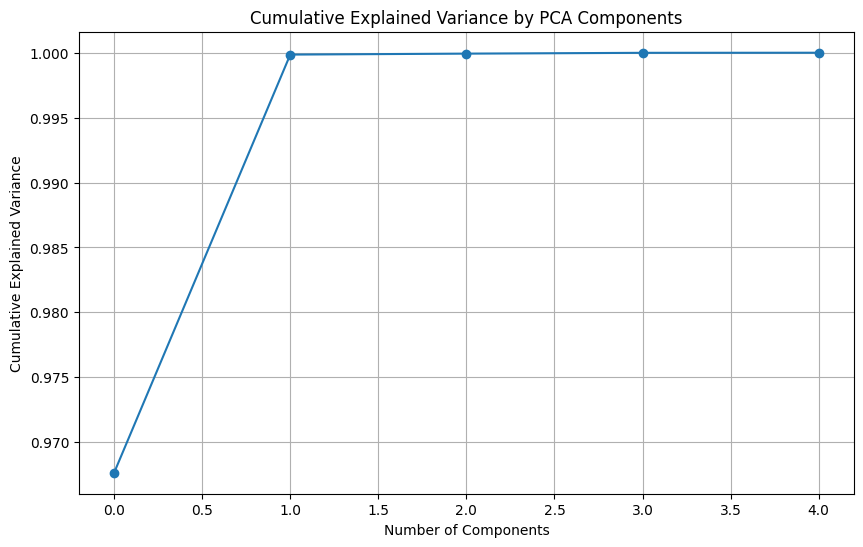

In [479]:
df_numeric = df[transaction_cols].apply(pd.to_numeric, errors='coerce')
pca = PCA()
pca_feat = pca.fit_transform(df_numeric)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()


In [480]:
#Performing PCA
pca = PCA(n_components=4)
pca.fit(df_numeric)
score_pca = pca.transform(df_numeric)


#Performed pca with 4 components which explain around 90% variance in the data.

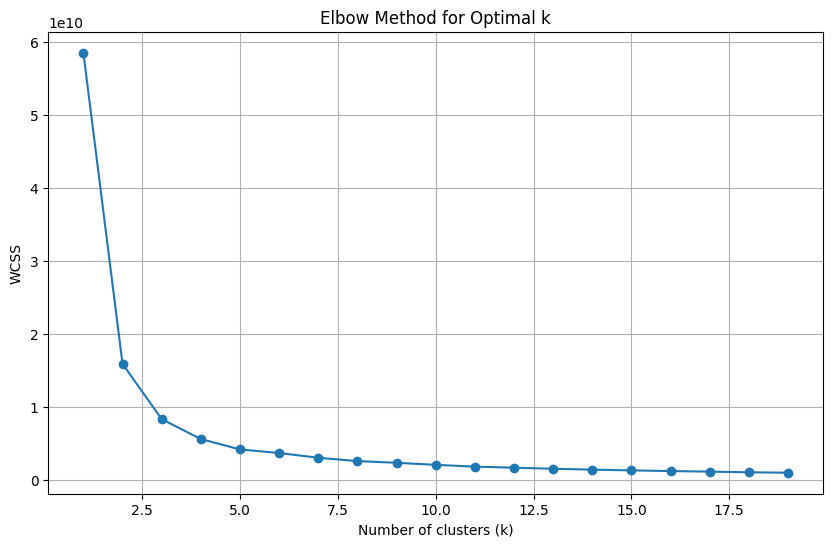

In [481]:
#Check clusters upto k=20
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(score_pca)
    wcss.append(kmeans.inertia_)

#Calculate number of clusters using elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

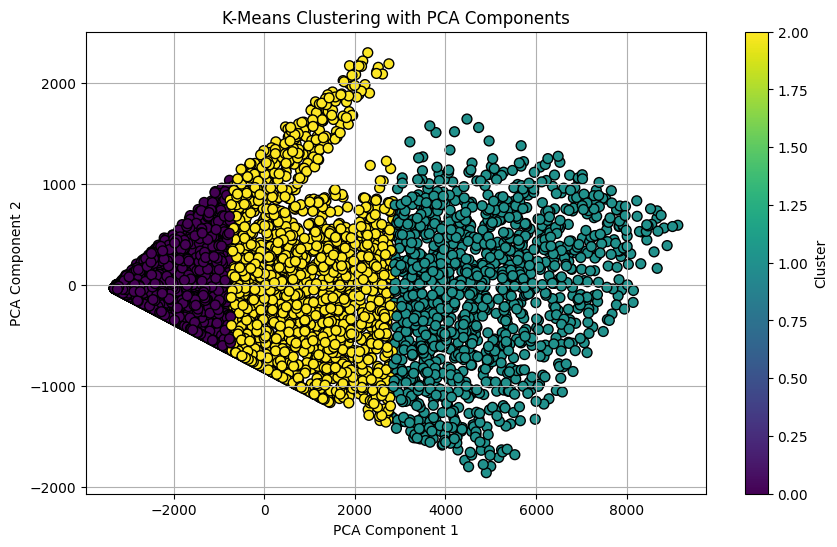

In [482]:
#From the elbow plot, we can choose k=4
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(score_pca)
df['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(score_pca[:, 0], score_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-Means Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [483]:
#Cluster Analysis
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)


Cluster
0    3415
2    1882
1    1291
Name: count, dtype: int64


In [484]:
#analyze churn rate in each cluster
churn_rate_per_cluster = df.groupby('Cluster')['viewer_status'].value_counts(normalize=True).unstack()
print(churn_rate_per_cluster)
print("Percentage of churned customers in each cluster:")
churn_percentage = churn_rate_per_cluster * 100
print(churn_percentage)

viewer_status   Churned    Stayed
Cluster                          
0              0.396779  0.603221
1              0.138652  0.861348
2              0.178002  0.821998
Percentage of churned customers in each cluster:
viewer_status    Churned     Stayed
Cluster                            
0              39.677892  60.322108
1              13.865221  86.134779
2              17.800213  82.199787


In [485]:
#Based on  the cluster analysis, we can see that Cluster 0 has the highest churn rate, while Cluster 2 has the lowest churn rate.

### Model Testing

Logistic Regression Accuracy: 0.8642
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       949
           1       0.77      0.74      0.75       369

    accuracy                           0.86      1318
   macro avg       0.83      0.83      0.83      1318
weighted avg       0.86      0.86      0.86      1318



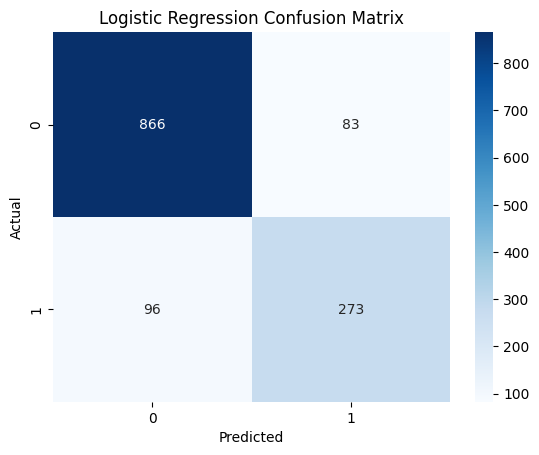

In [486]:
#Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_churn)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test_churn, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.4f}')
print(classification_report(y_test_churn, y_pred_log_reg))
#print confusion matrix
from sklearn.metrics import confusion_matrix
cm_log_reg = confusion_matrix(y_test_churn, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



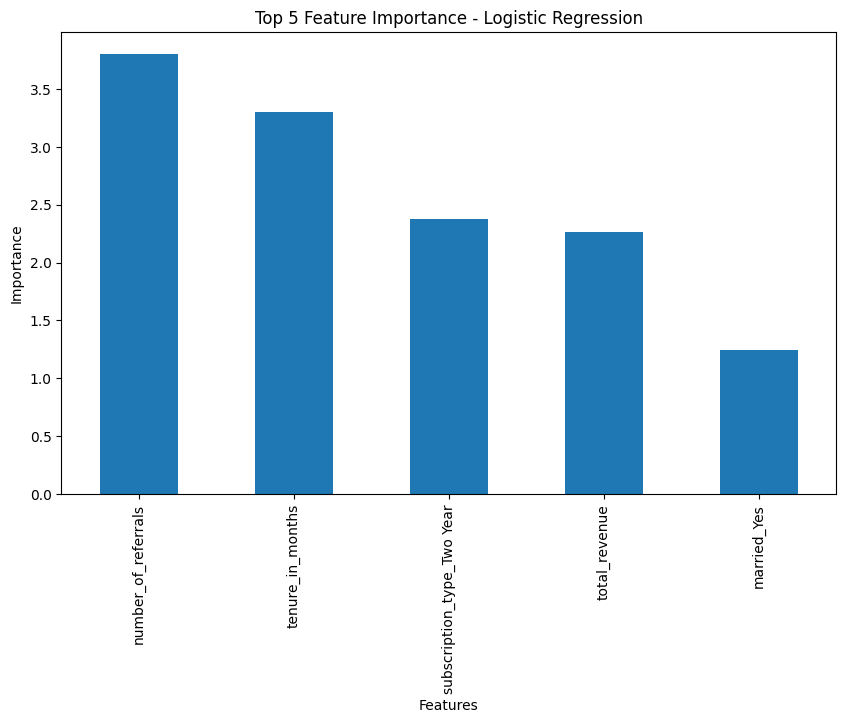

In [487]:
#plot feature importance for logistic regression
importance_log_reg = np.abs(log_reg.coef_[0])
feature_names = X.columns
feature_importance_log_reg = pd.Series(importance_log_reg, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_log_reg.head(5).plot(kind='bar')
plt.title('Top 5 Feature Importance - Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [488]:
#Top 5 features indicating churn in logistic regression model
print("Top 5 features indicating churn:")
print(feature_importance_log_reg.head(5))


Top 5 features indicating churn:
number_of_referrals           3.801578
tenure_in_months              3.297617
subscription_type_Two Year    2.373981
total_revenue                 2.260866
married_Yes                   1.241641
dtype: float64


Random Forest Classifier Accuracy: 0.8778
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       949
           1       0.86      0.67      0.76       369

    accuracy                           0.88      1318
   macro avg       0.87      0.82      0.84      1318
weighted avg       0.88      0.88      0.87      1318



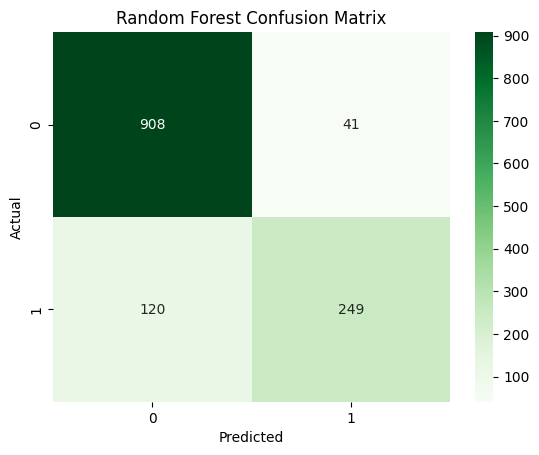

In [489]:
#Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train_churn)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test_churn, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf:.4f}')
print(classification_report(y_test_churn, y_pred_rf))
#Confusion matrix for random forest
cm_rf = confusion_matrix(y_test_churn, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


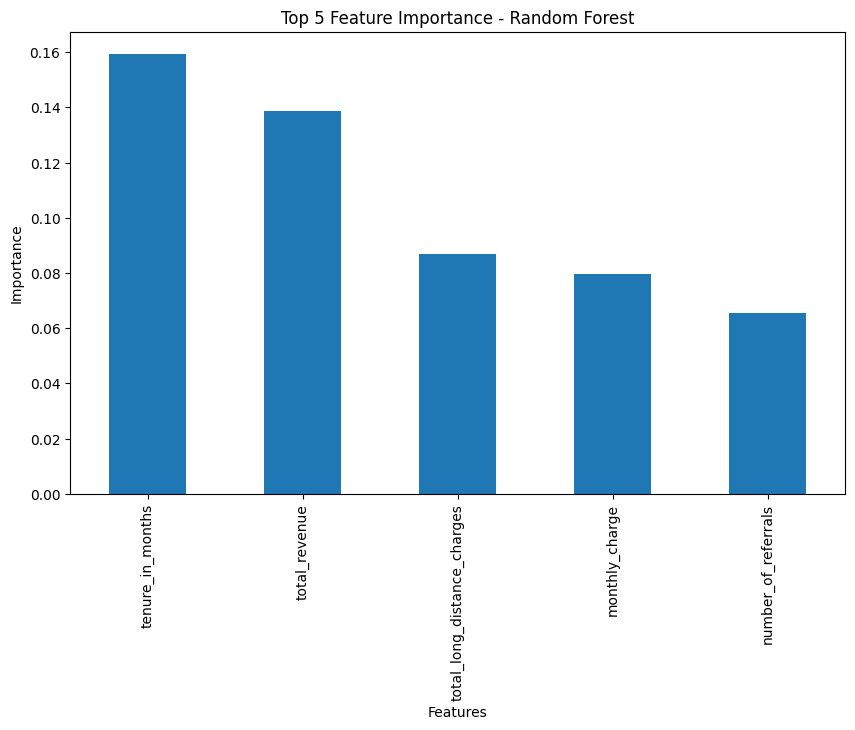

In [490]:
#plot feature importance for random forest
importance_rf = rf_clf.feature_importances_
feature_importance_rf = pd.Series(importance_rf, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_rf.head(5).plot(kind='bar')
plt.title('Top 5 Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [491]:
#Top 5 features indicating churn in random forest model
print("Top 5 features indicating churn (Random Forest):")
print(feature_importance_rf.head(5))

Top 5 features indicating churn (Random Forest):
tenure_in_months               0.159407
total_revenue                  0.138575
total_long_distance_charges    0.086929
monthly_charge                 0.079538
number_of_referrals            0.065448
dtype: float64


1. Based on the cluster analysis the recommendation to reduce churn rate would be to focus on Cluster 0 which has the highest churn rate 39%
2. Based on Supervised learning models, Random forest model provided a better accuracy on predicting churned and stayed
3. Based on the features affecting churn rate from Random forest the recommendations would be:
    -  provide new customers with discounts to avoid early churn rate
    -  Reducing monthly charges 
    - Strengthen referral rewards